# Conversion Rate
## Challenge Description
   We have data about users who hit our site: whether they converted or not as well as some of their characteristics such as their country, the marketing channel, their age, whether they are repeat users and the number of pages visited during that session (as a proxy for site activity/time spent on site).

Your project is to:
* Predict conversion rate
* Come up with recommendations for the product team and the marketing team to improve conversion rate

## Columns:
* country : user country based on the IP address
* age : user age. Self-reported at sign-in step
* new_user : whether the user created the account during this session or had already an account and simply came back to the site
* source : marketing channel source
* Ads: came to the site by clicking on an advertisement
* Seo: came to the site by clicking on search results
* Direct: came to the site by directly typing the URL on the browser
* total_pages_visited: number of total pages visited during the session. This is a proxy for time spent on site and engagement during the session.
* converted: this is our label. 1 means they converted within the session, 0 means they left without buying anything. The company goal is to increase conversion rate: # conversions / total sessions.

## Explore data 

In [9]:
# import some necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics 

In [2]:
# read csv file
df = pd.read_csv('conversion_data.csv')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
# explore some basic info of the data like how many pages and age
df.groupby('source')[['age','total_pages_visited']].describe()

age                                                      \
           count       mean       std   min   25%   50%   75%    max   
source                                                                 
Ads      88740.0  30.534742  8.239864  17.0  24.0  30.0  36.0  111.0   
Direct   72420.0  30.567978  8.272502  17.0  24.0  30.0  36.0   79.0   
Seo     155040.0  30.590835  8.289685  17.0  24.0  30.0  36.0  123.0   

       total_pages_visited                                                
                     count      mean       std  min  25%  50%  75%   max  
source                                                                    
Ads                88740.0  4.899538  3.384374  1.0  2.0  4.0  7.0  29.0  
Direct             72420.0  4.816901  3.282562  1.0  2.0  4.0  6.0  29.0  
Seo               155040.0  4.883946  3.343005  1.0  2.0  4.0  7.0  27.0

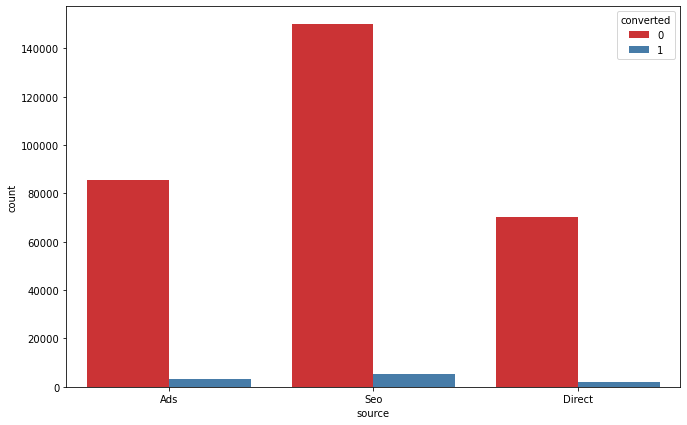

In [4]:
plt.figure(figsize=(11,7))
sns.countplot(x='source',hue='converted',data=df,palette='Set1')

In [5]:
#explore the relationship between country and age and pages
df.groupby('country')[['age','total_pages_visited']].describe()

age                                                      \
            count       mean       std   min   25%   50%   75%    max   
country                                                                 
China     76602.0  30.672972  8.283862  17.0  24.0  30.0  36.0   69.0   
Germany   13056.0  30.449985  8.289022  17.0  24.0  30.0  36.0  123.0   
UK        48450.0  30.451538  8.244991  17.0  24.0  30.0  36.0  111.0   
US       178092.0  30.566482  8.272128  17.0  24.0  30.0  36.0   79.0   

        total_pages_visited                                                
                      count      mean       std  min  25%  50%  75%   max  
country                                                                    
China               76602.0  4.553523  2.804987  1.0  2.0  4.0  6.0  26.0  
Germany             13056.0  5.190717  3.762899  1.0  2.0  4.0  7.0  27.0  
UK                  48450.0  5.082167  3.630763  1.0  2.0  4.0  7.0  27.0  
US                 178092.0  4.930160  3.427085  1.0  2.0  4.0  7.0  29.0

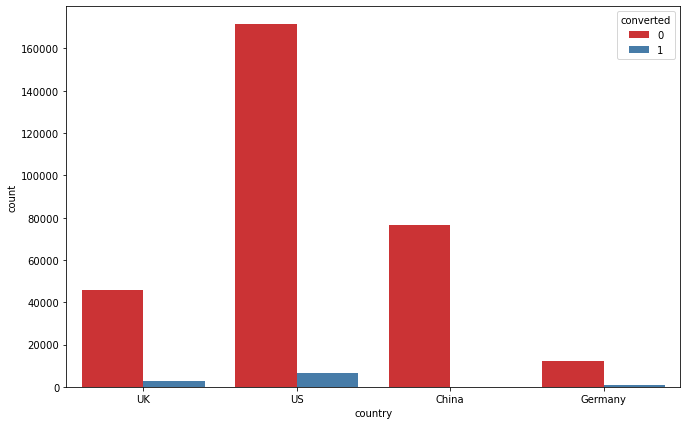

In [6]:
#explore the relationship between country and convert rate -> have similiar data country may not import factor
plt.figure(figsize=(11,7))
sns.countplot(x='country',hue='converted',data=df,palette='Set1')

In [7]:
df.groupby('converted')[['age','total_pages_visited']].describe()

age                                                      \
              count       mean       std   min   25%   50%   75%    max   
converted                                                                 
0          306000.0  30.703961  8.275779  17.0  24.0  30.0  36.0   79.0   
1           10200.0  26.546765  7.051849  17.0  21.0  25.0  31.0  123.0   

          total_pages_visited                                              \
                        count       mean       std  min   25%   50%   75%   
converted                                                                   
0                    306000.0   4.550281  2.789910  1.0   2.0   4.0   6.0   
1                     10200.0  14.553529  3.963392  2.0  12.0  14.0  17.0   

                 
            max  
converted        
0          20.0  
1          29.0

In [10]:
#conversion rate
statistics.mean(df['converted'])

0.03225806451612903

#### A few quick observations:
* the site is probably a US site, although it does have a large Chinese user base as well user base is pretty young
* conversion rate at around 3% is industry standard. It makes sense.
* everything seems to make sense here except for max age 123 yrs! Let’s investigate it:

## Remove outliners

In [67]:
df[df['age']> 99]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [68]:
df = df[df['age'] < 99]

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


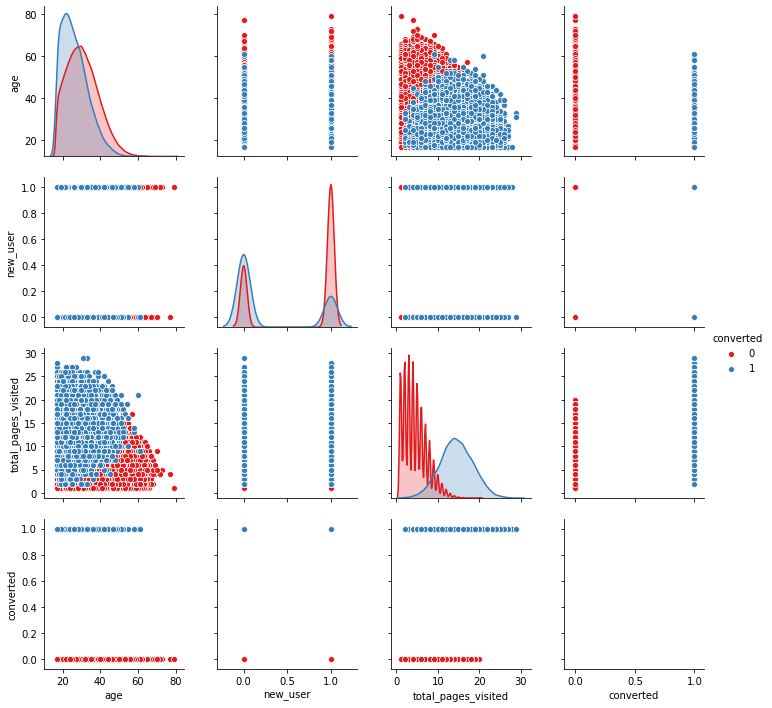

In [69]:
#data = df.drop('converted', axis =1)
sns.pairplot(df, hue = 'converted',  palette='Set1')

In [70]:
# find some interesting grap above like the total pages visited and new users having total differnt hist of convert.


Text(0.5, 0, 'total_pages_visited')

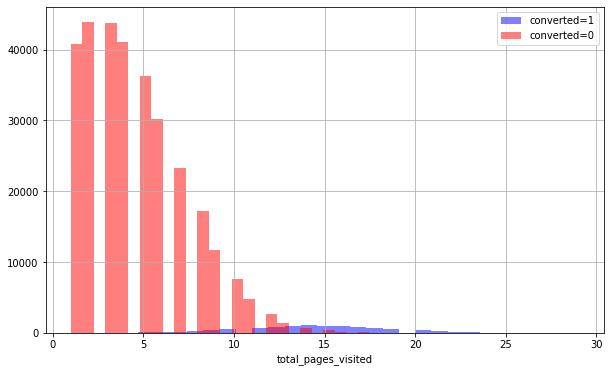

In [71]:
# convert rate and total_pages_visited
plt.figure(figsize=(10,6))
df[df['converted']==1]['total_pages_visited'].hist(alpha=0.5,color='blue',
                                              bins=30,label='converted=1')
df[df['converted']==0]['total_pages_visited'].hist(alpha=0.5,color='red',
                                              bins=30,label='converted=0')
plt.legend()
plt.xlabel('total_pages_visited')

Text(0.5, 1.0, 'total_pages_visited')

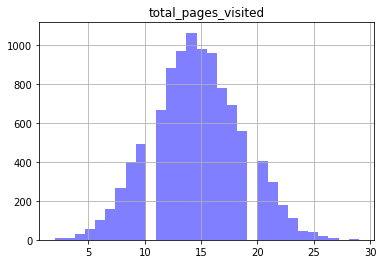

In [72]:
df[df['converted']==1]['total_pages_visited'].hist(alpha=0.5,color='blue',
                                              bins=30,label='converted=1')
plt.title('total_pages_visited')

Text(0.5, 0, 'total_pages_visited')

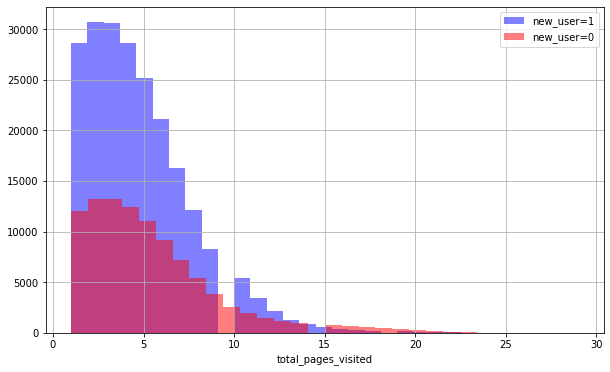

In [73]:
# user status and total_pages_visited
plt.figure(figsize=(10,6))
df[df['new_user']==1]['total_pages_visited'].hist(alpha=0.5,color='blue',
                                              bins=30,label='new_user=1')
df[df['new_user']==0]['total_pages_visited'].hist(alpha=0.5,color='red',
                                              bins=30,label='new_user=0')
plt.legend()
plt.xlabel('total_pages_visited')

# Categorical Features¶

In [11]:
cat_cfeats = ['country']

In [17]:
data_cfeats = pd.get_dummies(df,columns=cat_cfeats)

In [18]:
cat_sfeats = ['source']

In [19]:
final_data = pd.get_dummies(data_cfeats,columns=cat_sfeats)

In [20]:
final_data.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


In [21]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   age                  316200 non-null  int64
 1   new_user             316200 non-null  int64
 2   total_pages_visited  316200 non-null  int64
 3   converted            316200 non-null  int64
 4   country_China        316200 non-null  uint8
 5   country_Germany      316200 non-null  uint8
 6   country_UK           316200 non-null  uint8
 7   country_US           316200 non-null  uint8
 8   source_Ads           316200 non-null  uint8
 9   source_Direct        316200 non-null  uint8
 10  source_Seo           316200 non-null  uint8
dtypes: int64(4), uint8(7)
memory usage: 11.8 MB


# Decision Tree

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = final_data.drop('converted',axis=1)
y = final_data['converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree = DecisionTreeClassifier()

In [27]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predict conversion rate

In [28]:
predictions = dtree.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91871
           1       0.82      0.64      0.72      2989

    accuracy                           0.98     94860
   macro avg       0.90      0.82      0.86     94860
weighted avg       0.98      0.98      0.98     94860



In [31]:
print(confusion_matrix(y_test,predictions))

[[91447   424]
 [ 1075  1914]]


In [34]:
accuracy_score(y_test,predictions,normalize=True)

0.9841977651275564

 * accuracy looks good!! more than 80%

#### Some conclusions and suggestions:
1. The site is working very well for young users. Definitely let’s tell marketing to advertise and use marketing channel which are more likely to reach young people.
2. The site is working very well for Germany in terms of conversion. But the summary showed that there are few Germans coming to the site: way less than UK, despite a larger population. Again, marketing should get more Germans. Big opportunity.
3. Users with old accounts do much better. Targeted emails with offers to bring them back to the site could be a good idea to try.
4. Something is wrong with the Chinese version of the site. It is either poorly translated, doesn’t fit the local culture, some payment issue or maybe it is just in English! Given how many users are based in China, fixing this should be a top priority. Huge opportunity.
5. Maybe go through the UI and figure out why older users perform so poorly? From 30 y/o conversion clearly starts dropping.
6. If I know someone has visited many pages, but hasn’t converted, she almost surely has high purchase intent. I could email her targeted offers or sending her reminders. Overall, these are probably the easiest users to make convert.


#### Suggestions:
* tell marketing to get more of the good performing user segments
* tell product to fix the experience for the bad performing ones